In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#https://www.kaggle.com/c/mooc-dropout-prediction-17/data

In [2]:
data = pd.read_csv('MOOC_Visual.csv', parse_dates=['startdate', 'enddate'])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72325 entries, 0 to 72324
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   enrollment_id     72325 non-null  int64         
 1   startdate         72325 non-null  datetime64[ns]
 2   enddate           72325 non-null  datetime64[ns]
 3   access            72325 non-null  int64         
 4   discussion        72325 non-null  int64         
 5   navigate          72325 non-null  int64         
 6   page_close        72325 non-null  int64         
 7   problem           72325 non-null  int64         
 8   video             72325 non-null  int64         
 9   wiki              72325 non-null  int64         
 10  proccess_period   72325 non-null  float64       
 11  present_days      72325 non-null  int64         
 12  effective_time    72325 non-null  float64       
 13  Friday            72325 non-null  int64         
 14  Monday            7232

In [4]:
data.isnull().sum()

enrollment_id       0
startdate           0
enddate             0
access              0
discussion          0
navigate            0
page_close          0
problem             0
video               0
wiki                0
proccess_period     0
present_days        0
effective_time      0
Friday              0
Monday              0
Saturday            0
Sunday              0
Thursday            0
Tuesday             0
Wednesday           0
holidays            0
course_enroll       0
user_enroll         0
course_drop_rate    0
dropout_prob        0
dtype: int64

In [5]:
data.describe()

,enrollment_id,access,discussion,navigate,page_close,problem,video,wiki,proccess_period,present_days,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,holidays,course_enroll,user_enroll,course_drop_rate,dropout_prob
count,72325.000000,72325.000000,72325.000000,72325.000000,72325.000000,72325.000000,72325.000000,72325.000000,72325.000000,72325.000000,...,72325.000000,72325.000000,72325.000000,72325.000000,72325.00000,72325.000000,72325.000000,72325.000000,72325.000000,72325.000000
mean,36163.000000,25.707045,5.247992,8.330052,10.182966,10.446429,6.566678,0.741652,5.790234,2.662067,...,0.328033,0.343173,0.394940,0.409139,0.39870,0.095099,5618.856772,2.460242,0.793640,0.793640
std,20878.573447,54.679282,28.351693,12.641069,20.552585,34.335217,14.662946,3.503804,8.966359,3.093727,...,0.627570,0.649591,0.693014,0.711455,0.68801,0.293918,3686.987244,2.381182,0.066570,0.404695
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,645.000000,1.000000,0.666866,0.000000
25%,18082.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.001204,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2151.000000,1.000000,0.763524,1.000000
50%,36163.000000,6.000000,0.000000,4.000000,2.000000,0.000000,1.000000,0.000000,0.045914,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,4684.000000,2.000000,0.799671,1.000000
75%,54244.000000,26.000000,2.000000,10.000000,9.000000,6.000000,6.000000,1.000000,9.932766,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,9382.000000,3.000000,0.836914,1.000000
max,72325.000000,3659.000000,1930.000000,409.000000,413.000000,1014.000000,536.000000,243.000000,29.987014,30.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,2.000000,12004.000000,27.000000,0.938356,1.000000


In [6]:
data.head()

,enrollment_id,startdate,enddate,access,discussion,navigate,page_close,problem,video,wiki,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,holidays,course_enroll,user_enroll,course_drop_rate,dropout_prob
0,1,2014-05-31,2014-06-01,27,0,8,0,79,0,0,...,1,1,0,0,0,0,4684,1,0.826534,1
1,2,2014-06-04,2014-06-04,7,4,3,4,0,3,1,...,0,0,0,0,1,0,7775,1,0.836914,1
2,3,2014-06-04,2014-06-08,34,1,6,7,0,9,0,...,1,1,1,0,1,0,3005,2,0.868481,0
3,4,2014-06-12,2014-06-13,54,4,6,46,21,31,1,...,0,0,1,0,0,0,2981,2,0.799671,1
4,5,2014-07-01,2014-07-01,0,0,2,0,0,0,0,...,0,0,0,1,0,0,10322,1,0.695925,1


In [7]:
data['dropout_prob'].value_counts()

1    57400
0    14925
Name: dropout_prob, dtype: int64

#seems dataset is not balance

(array([7.21e+04, 2.14e+02, 4.00e+00, 5.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 2.00e+00]),
 array([   0. ,  365.9,  731.8, 1097.7, 1463.6, 1829.5, 2195.4, 2561.3,
        2927.2, 3293.1, 3659. ]),
 <a list of 10 Patch objects>)

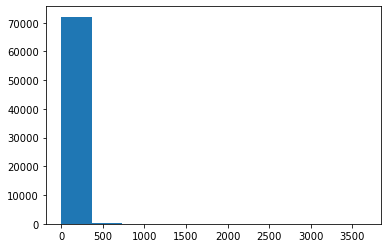

In [8]:
plt.hist(data['access'])

In [9]:
data['access'].value_counts()

0       17485
2        6397
3        4002
4        3117
5        2803
        ...  
3659        1
416         1
1438        1
669         1
447         1
Name: access, Length: 511, dtype: int64

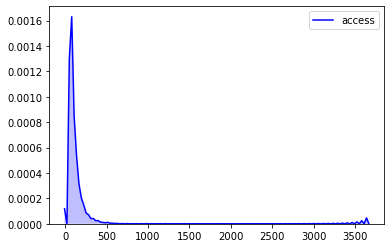

In [10]:
sns.kdeplot(data['access'], color='b', shade=True)

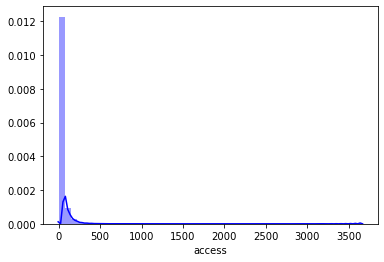

In [11]:
sns.distplot(data['access'], color='b', kde=True)

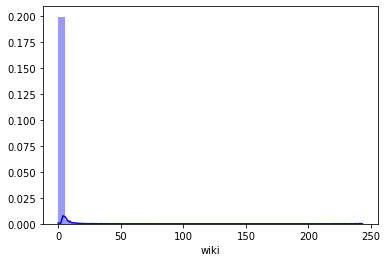

In [12]:
sns.distplot(data['wiki'], color='b', kde=True)

In [13]:
data['wiki'].value_counts()

0      53589
1      10299
2       3575
3       1707
4        937
       ...  
52         1
243        1
175        1
113        1
127        1
Name: wiki, Length: 84, dtype: int64

In [14]:
col = data.columns

In [15]:
col.size

25

In [16]:
col

Index(['enrollment_id', 'startdate', 'enddate', 'access', 'discussion',
       'navigate', 'page_close', 'problem', 'video', 'wiki', 'proccess_period',
       'present_days', 'effective_time', 'Friday', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'holidays',
       'course_enroll', 'user_enroll', 'course_drop_rate', 'dropout_prob'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


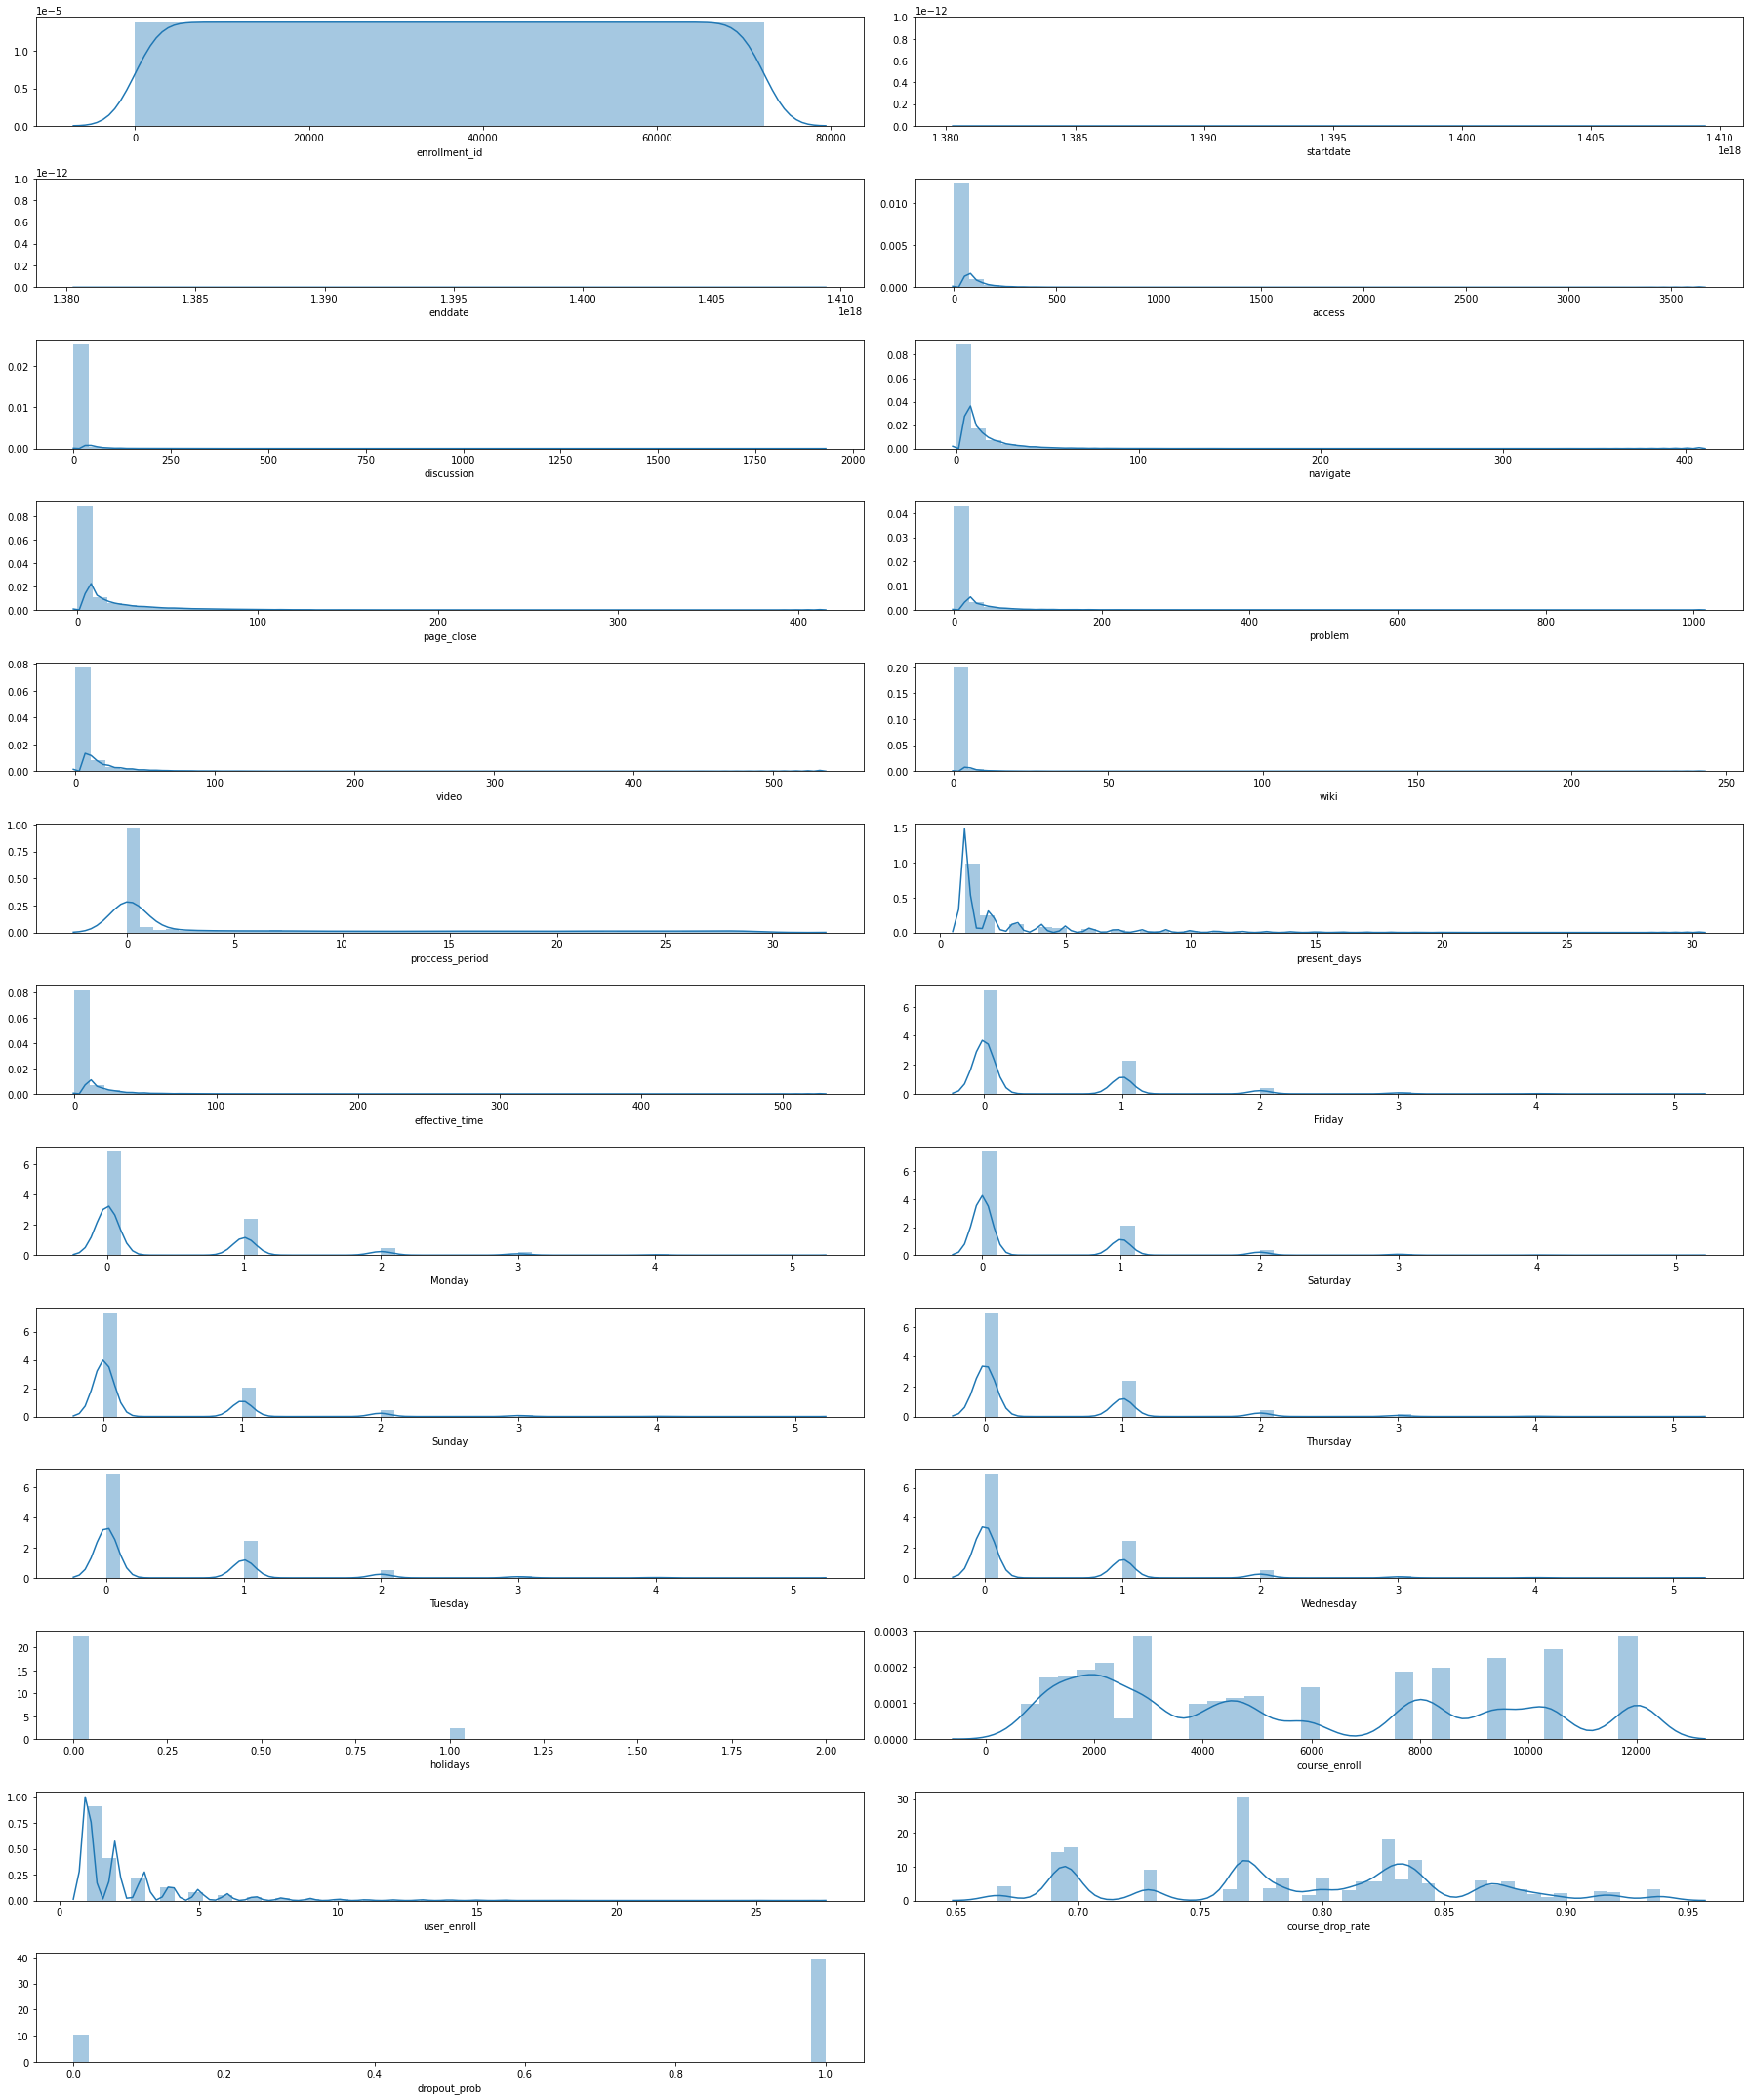

In [17]:
plt.figure(figsize=(25,30))
plotno=1

for i in col:
    plt.subplot(13,2,plotno)
    sns.distplot(data[i])
    plotno +=1
    plt.tight_layout()


In [18]:
data[data['dropout_prob']==1].shape

(57400, 25)

In [19]:
data[data['dropout_prob']==0].shape

(14925, 25)

In [20]:
dropout_prob_majority = data[data['dropout_prob']==1]

In [21]:
dropout_prob_majority.shape

(57400, 25)

In [22]:
dropout_prob_minority = data[data['dropout_prob']==0]

In [24]:
dropout_prob_minority.shape

(14925, 25)

# balancing Data set using upsampling

In [23]:
from sklearn.utils import resample

In [24]:
dropout_prob_minority_balanced = resample(dropout_prob_minority, replace=True, n_samples=dropout_prob_majority.shape[0])

In [25]:
dropout_prob_minority_balanced

,enrollment_id,startdate,enddate,access,discussion,navigate,page_close,problem,video,wiki,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,holidays,course_enroll,user_enroll,course_drop_rate,dropout_prob
39744,39745,2014-07-04,2014-07-09,16,0,4,2,0,1,0,...,0,0,0,0,1,1,10322,1,0.695925,0
439,440,2014-05-26,2014-06-20,67,13,18,58,21,26,2,...,1,0,1,2,0,1,2796,2,0.666866,0
4201,4202,2014-07-04,2014-08-01,76,2,35,1,117,1,0,...,1,1,3,3,2,1,1471,8,0.919355,0
33980,33981,2014-06-15,2014-07-11,122,38,24,70,69,24,2,...,2,3,1,2,1,1,10322,1,0.695925,0
44004,44005,2013-12-16,2013-12-23,258,12,40,4,52,111,5,...,0,1,1,1,1,0,2392,1,0.779887,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48097,48098,2013-11-27,2013-11-28,12,0,15,8,0,8,0,...,0,0,1,0,1,1,1476,2,0.797740,0
31536,31537,2014-06-17,2014-06-17,8,0,5,3,0,3,1,...,0,0,0,1,0,0,4307,2,0.782592,0
54221,54222,2014-06-25,2014-06-25,0,0,2,0,0,0,0,...,0,0,0,0,1,0,1235,2,0.813492,0
21251,21252,2013-12-22,2013-12-22,2,0,1,0,0,1,0,...,0,1,0,0,0,0,12004,2,0.768745,0


In [26]:
data_balanced = pd.concat([dropout_prob_majority, dropout_prob_minority_balanced])

In [27]:
data_balanced.head()

,enrollment_id,startdate,enddate,access,discussion,navigate,page_close,problem,video,wiki,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,holidays,course_enroll,user_enroll,course_drop_rate,dropout_prob
0,1,2014-05-31,2014-06-01,27,0,8,0,79,0,0,...,1,1,0,0,0,0,4684,1,0.826534,1
1,2,2014-06-04,2014-06-04,7,4,3,4,0,3,1,...,0,0,0,0,1,0,7775,1,0.836914,1
3,4,2014-06-12,2014-06-13,54,4,6,46,21,31,1,...,0,0,1,0,0,0,2981,2,0.799671,1
4,5,2014-07-01,2014-07-01,0,0,2,0,0,0,0,...,0,0,0,1,0,0,10322,1,0.695925,1
5,6,2014-07-16,2014-07-16,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1481,2,0.823991,1


In [28]:
data_balanced.shape

(114800, 25)

In [31]:
# using PCA for component analysis

In [29]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [30]:
X = data_balanced.drop(['dropout_prob', 'enrollment_id'], axis=1)

In [31]:
y = data_balanced['dropout_prob']

In [32]:
X['startdate'] = X['startdate'].map(datetime.datetime.toordinal)

In [33]:
X['enddate'] = X['enddate'].map(datetime.datetime.toordinal)

In [34]:
X.head()

,startdate,enddate,access,discussion,navigate,page_close,problem,video,wiki,proccess_period,...,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,holidays,course_enroll,user_enroll,course_drop_rate
0,735384,735385,27,0,8,0,79,0,0,1.053588,...,0,1,1,0,0,0,0,4684,1,0.826534
1,735388,735388,7,4,3,4,0,3,1,0.016782,...,0,0,0,0,0,1,0,7775,1,0.836914
3,735396,735397,54,4,6,46,21,31,1,0.766829,...,0,0,0,1,0,0,0,2981,2,0.799671
4,735415,735415,0,0,2,0,0,0,0,0.000150,...,0,0,0,0,1,0,0,10322,1,0.695925
5,735430,735430,0,0,1,0,0,0,0,0.000000,...,0,0,0,0,0,1,0,1481,2,0.823991


In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
st = StandardScaler()

In [37]:
X = st.fit_transform(X)

In [38]:
X

array([[ 0.63735153,  0.54567405, -0.23297431, ..., -0.3299871 ,
        -0.62477134,  0.61560118],
       [ 0.6823218 ,  0.57950677, -0.50933253, ...,  0.50431154,
        -0.62477134,  0.77214708],
       [ 0.77226234,  0.68100495,  0.14010928, ..., -0.78964759,
        -0.24402555,  0.21046866],
       ...,
       [ 0.91841571,  0.81633586, -0.6060579 , ..., -1.2609143 ,
        -0.24402555,  0.41891056],
       [-1.16145926, -1.27001564, -0.57842208, ...,  1.64577027,
        -0.24402555, -0.25592968],
       [-1.54370655, -1.57451018,  1.39753917, ..., -1.21583896,
        -0.62477134,  0.87065882]])

In [39]:
pca = PCA()

In [40]:
pca.fit(X)

PCA()

In [41]:
pca.explained_variance_ratio_

array([3.93599318e-01, 9.37921567e-02, 7.08262017e-02, 5.09458191e-02,
       4.63961771e-02, 3.96568442e-02, 3.34273577e-02, 3.32663248e-02,
       3.11006223e-02, 3.02537714e-02, 2.49703052e-02, 2.36490048e-02,
       2.21798513e-02, 2.06644594e-02, 1.99766737e-02, 1.62756393e-02,
       1.45827640e-02, 1.17811769e-02, 8.83087377e-03, 7.46812928e-03,
       6.35641073e-03, 1.18731805e-07, 2.48048457e-32])

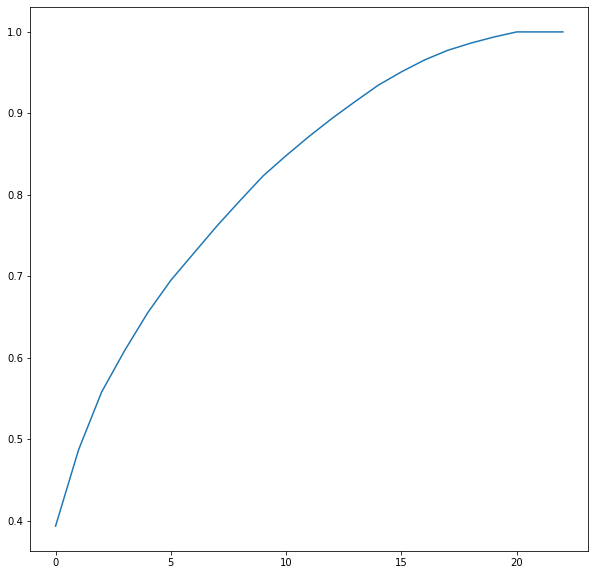

In [42]:
plt.figure(figsize=(10,10))
plt.plot(pca.explained_variance_ratio_.cumsum())

# we can see that 19-20 feature can explain our 99% data

In [43]:
pca = PCA(n_components=19)

In [44]:
X = pca.fit_transform(X)

In [45]:
X

array([[-1.30798081,  1.09296283,  0.21620443, ..., -0.05063467,
         0.19604387, -0.08788515],
       [-2.13017647,  0.62113658, -0.34425765, ..., -0.7201752 ,
        -0.07493184, -0.06255249],
       [-0.64320233,  1.23498022,  0.21245393, ...,  0.22305897,
        -0.22212256, -0.49107022],
       ...,
       [-2.31378813,  1.53766566,  0.25489757, ...,  0.65664233,
         0.10988486, -0.16549386],
       [-2.12230373, -2.23859472, -0.12887484, ..., -0.73457576,
        -0.18900216, -0.06752055],
       [ 2.36969184, -0.92247752,  2.72787636, ...,  0.28608478,
        -0.59796603, -0.5752878 ]])

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, KFold

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size=0.3)

In [50]:
Grb = GradientBoostingClassifier()

In [51]:
Grb.fit(X_train, y_train)

GradientBoostingClassifier()

In [53]:
y_pred = Grb.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [55]:
print(confusion_matrix(y_test, y_pred))

[[13031  4128]
 [ 2779 14502]]


In [57]:
print(accuracy_score(y_test, y_pred))

0.7994483159117306


In [58]:
print(f1_score(y_test, y_pred))

0.8076633900476178


In [60]:
y_pred_train = Grb.predict(X_train)

In [61]:
print(accuracy_score(y_train, y_pred_train))

0.800895968143355


In [62]:
print(f1_score(y_train, y_pred_train))

0.8089460989181573


In [63]:
print(confusion_matrix(y_pred_train, y_train))

[[30487  6246]
 [ 9754 33873]]


In [65]:
gridCV = GridSearchCV(estimator=Grb, param_grid={'learning_rate': [0.1,0.2,0.3]}, n_jobs=-1, verbose=10)

In [66]:
gridCV.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:  2.4min remaining: 15.8min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  2.4min remaining:  6.7min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:  2.4min remaining:  3.6min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  2.4min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  4.6min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  4.7min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.7min finished


GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3]}, verbose=10)

In [67]:
gridCV.best_params_

{'learning_rate': 0.3}

In [68]:
grb_final = GradientBoostingClassifier(learning_rate=0.3)

In [69]:
grb_final.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.3)

In [70]:
y_pred = grb_final.predict(X_test)

In [71]:
print(accuracy_score(y_test, y_pred))

0.8085656213704994


In [72]:
print(f1_score(y_test, y_pred))

0.8151616249404244


In [73]:
y_pred_train = grb_final.predict(X_train)

In [74]:
print(accuracy_score(y_train, y_pred_train))

0.8148332503733201


In [75]:
print(f1_score(y_train, y_pred_train))

0.8210678210678211
